In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("data//Bengaluru_House_Data.csv")
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Let's drop columns that are not required for our model:

In [6]:
df1 = df.drop(['area_type','society','balcony','availability'], axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df1.shape

(13320, 5)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [9]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df1.dropna(inplace=True)

In [11]:
df1[df1.duplicated()]

,location,size,total_sqft,bath,price
242,Chandapura,1 BHK,645,1.0,16.45
887,Chandapura,2 BHK,1015,2.0,25.88
895,Whitefield,2 BHK,1116,2.0,51.91
905,Kanakpura Road,1 BHK,525,1.0,26.00
971,Haralur Road,3 BHK,1464,3.0,56.00
...,...,...,...,...,...
13291,Weavers Colony,1 Bedroom,812,1.0,26.00
13299,Whitefield,4 BHK,2830 - 2882,5.0,154.50
13311,Ramamurthy Nagar,7 Bedroom,1500,9.0,250.00
13313,Uttarahalli,3 BHK,1345,2.0,57.00


In [12]:
len(df1[df1.duplicated()])

881

In [13]:
df1.loc[(df1.location=="Chandapura") & (df1.price==16.45)]

,location,size,total_sqft,bath,price
240,Chandapura,1 BHK,645,1.0,16.45
242,Chandapura,1 BHK,645,1.0,16.45
2755,Chandapura,1 BHK,645,1.0,16.45
4505,Chandapura,1 BHK,645,1.0,16.45
4688,Chandapura,1 BHK,645,1.0,16.45
6330,Chandapura,1 BHK,645,1.0,16.45
6525,Chandapura,1 BHK,645,1.0,16.45
6976,Chandapura,1 BHK,645,1.0,16.45
7261,Chandapura,1 BHK,645,1.0,16.45
12746,Chandapura,1 BHK,645,1.0,16.45


In [14]:
df1.loc[(df1.location=="Whitefield") & (df1.total_sqft=="2830 - 2882")]

,location,size,total_sqft,bath,price
2575,Whitefield,4 BHK,2830 - 2882,5.0,145.5
6275,Whitefield,4 BHK,2830 - 2882,5.0,154.5
6334,Whitefield,4 BHK,2830 - 2882,5.0,158.5
6643,Whitefield,4 BHK,2830 - 2882,5.0,157.5
13299,Whitefield,4 BHK,2830 - 2882,5.0,154.5


Let's drop duplicate rows:

In [15]:
df1.drop(df1[df1.duplicated()].index, axis=0, inplace=True)

dropped 881 duplicate rows

In [16]:
df1.shape

(12365, 5)

In [17]:
len(df1[df1.duplicated()])

0

In [18]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Handling columns

In [20]:
for i in df1.columns:
    print(i, "column, unique values: ", df1[i].unique())
    print("************")
    print("")

location column, unique values:  ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
************

size column, unique values:  ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']
************

total_sqft column, unique values:  ['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']
************

bath column, unique values:  [ 2.  5.  3.  4.  6.  1.  9.  8.  7. 11. 10. 14. 27. 12. 16. 40. 15. 13.
 18.]
************

price column, unique values:  [ 39.07 120.    62.   ...  40.14 231.   488.  ]
************



In [21]:
for i in df1.columns:
    print(i, "column, unique values: ", df1[i].nunique())
    print("************")
    print("")

location column, unique values:  1304
************

size column, unique values:  31
************

total_sqft column, unique values:  2067
************

bath column, unique values:  19
************

price column, unique values:  1955
************



### Handling "size" column

Let's drop the nonnumerical values in the size column, and show it in a different column:

In [22]:
df1['BHK'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [23]:
df1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [24]:
df2 = df1.drop(['size'], axis='columns')
df2.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


### Handling "total_sqft" column

Some range values were observed in the "total_sqft" column

let's show non-floats:

In [25]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [27]:
df2.shape

(12365, 5)

As seen in the above table, some values are in the range. We can convert them to a numeric value by averaging those.

There are also values with different units (Sq. Meter etc.). We planned to drop them.

In [28]:
def convert_to_num(x):
    parts = x.split('-')
    if len(parts) == 2:
        return (float(parts[0])+float(parts[1]))/2
    try:
        return float(x)
    except:
        return None

In [29]:
df2.loc[672]

location      Bettahalsoor
total_sqft     3090 - 5002
bath                   4.0
price                445.0
BHK                      4
Name: 672, dtype: object

In [30]:
df3= df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_to_num)
df3.head(10)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [31]:
df3.loc[672]

location      Bettahalsoor
total_sqft          4046.0
bath                   4.0
price                445.0
BHK                      4
Name: 672, dtype: object

In [32]:
(3090+5002)/2

4046.0

In [33]:
df3.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

we will drop values that include different units:

In [34]:
df3.dropna(inplace=True)

In [35]:
df3.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12319 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12319 non-null  object 
 1   total_sqft  12319 non-null  float64
 2   bath        12319 non-null  float64
 3   price       12319 non-null  float64
 4   BHK         12319 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 577.5+ KB


Let's add a new column called "price per square feet":

In [37]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [38]:
df4.price_per_sqft.describe()

count    1.231900e+04
mean     8.115050e+03
std      1.104734e+05
min      2.678298e+02
25%      4.307692e+03
50%      5.500000e+03
75%      7.452904e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [39]:
location_price_perS= df4.groupby('location')["price_per_sqft"].mean()
location_price_perS

location
 Anekal                  4558.404558
 Banaswadi               6641.366224
 Basavangudi             7462.686567
 Bhoganhalli             7733.108108
 Devarabeesana Halli     7900.452568
                            ...     
t.c palya               11851.851852
tc.palya                 5651.101350
vinayakanagar           16666.666667
white field,kadugodi    13095.238095
whitefiled               3500.534759
Name: price_per_sqft, Length: 1298, dtype: float64

### Handling "location" column

In [40]:
df4['location'].nunique()

1298

In [41]:
def name_correction(x):
    #x = x.lower() # all letters lower case
    x = re.sub('[^A-Za-z0-9А-Яа-я]+', ' ', x) # remove special characters
    x = x.replace('  ', ' ') # replace double spaces with single spaces
    x = x.strip() # remove leading and trailing white space
    return x

In [42]:
import re
df5 = df4.copy()
df5["location"] = df5["location"].apply(lambda x: name_correction(x))

In [43]:
df5['location'].nunique()

1279

In [44]:
locations= df5['location'].value_counts(ascending=False)
locations

Whitefield                         502
Sarjapur Road                      365
Electronic City                    275
Thanisandra                        224
Kanakpura Road                     215
                                  ... 
Lakshmipura Vidyaanyapura            1
Malur Hosur Road                     1
GB Palya                             1
Kengeri Satellite Town BDA SITE      1
Abshot Layout                        1
Name: location, Length: 1279, dtype: int64

Let's replace it with 'other' if the location count is less than 10

In [45]:
locations[locations<=10]

1st Block Koramangala              10
Naganathapura                      10
Thyagaraja Nagar                   10
BEML Layout                        10
Pattandur Agrahara                 10
                                   ..
Lakshmipura Vidyaanyapura           1
Malur Hosur Road                    1
GB Palya                            1
Kengeri Satellite Town BDA SITE     1
Abshot Layout                       1
Name: location, Length: 1049, dtype: int64

In [46]:
def make_other(x):
    if len(df5[df5['location']==x]) > 10:
        return x
    else:
        return 'other'

In [47]:
df5['location'] = df5['location'].apply(lambda x: make_other(x))

In [48]:
df5.loc[df5['location']=="other"]

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.00,6,36274.509804
18,other,2770.0,4.0,290.00,3,10469.314079
19,other,1100.0,2.0,48.00,2,4363.636364
25,other,1250.0,3.0,56.00,3,4480.000000
42,other,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...
13279,other,1200.0,5.0,130.00,6,10833.333333
13292,other,1440.0,2.0,63.93,3,4439.583333
13302,other,1075.0,2.0,48.00,2,4465.116279
13306,other,1200.0,5.0,325.00,4,27083.333333


In [49]:
df5.location.nunique()

231

In [50]:
df6 = df5[df5.location != 'other']

In [51]:
df6.location.nunique()

230

number of unique location= 1279--->230

### Handling "bath" column

In [52]:
df6.shape

(9420, 6)

In [53]:
df6.bath.value_counts()

2.0     4997
3.0     2371
4.0      842
1.0      551
5.0      349
6.0      173
7.0       61
8.0       38
9.0       24
10.0       7
12.0       3
11.0       2
40.0       1
13.0       1
Name: bath, dtype: int64

Text(0, 0.5, 'Count')

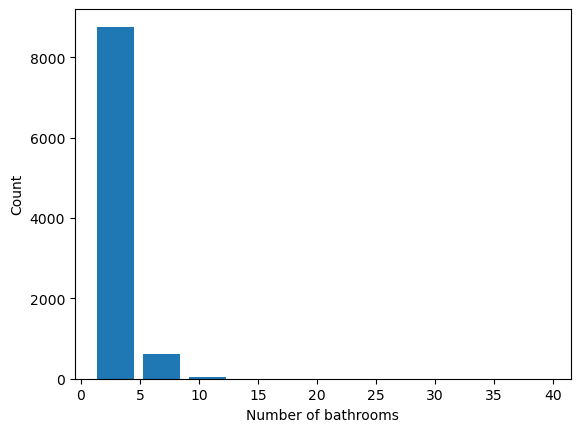

In [54]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

It seems logical that the number of bathrooms in a house would be at most 1 more than the number of bedrooms (one bathroom in each bedroom and a maximum of  bathroom for guests):

In [55]:
df7= df6[df6.bath<(df6.BHK+2)]
df7.shape

(9297, 6)

In [56]:
df7.bath.value_counts()

2.0     4997
3.0     2371
4.0      842
1.0      551
5.0      320
6.0      110
7.0       47
8.0       31
9.0       21
10.0       5
40.0       1
11.0       1
Name: bath, dtype: int64

In [57]:
df7.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


### Handling "square ft per bedroom"

Real estate experts say that a master bedroom averages 300 square meters, while the other bedrooms average 210 square meters each.

https://www.thebalancemoney.com/how-much-square-footage-do-you-need-5201264#:~:text=A%20master%20bedroom%20averages%20about,about%20210%20square%20feet%20each.

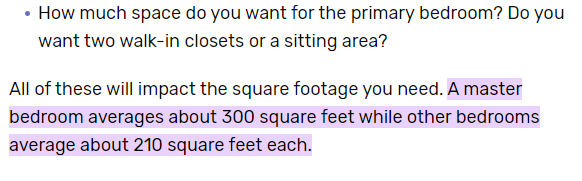

Let's drop the ones with a square ft per bedroom 255 ((300+210)/2) and below:

In [58]:
df8 = df7[~(df7.total_sqft/df7.BHK<255)]
df8.shape

(8962, 6)

## Handling Outliers

In [59]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8962 entries, 0 to 13318
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        8962 non-null   object 
 1   total_sqft      8962 non-null   float64
 2   bath            8962 non-null   float64
 3   price           8962 non-null   float64
 4   BHK             8962 non-null   int64  
 5   price_per_sqft  8962 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 490.1+ KB


In [60]:
Numerical=df8.select_dtypes(exclude='object').columns.tolist()
Numerical

['total_sqft', 'bath', 'price', 'BHK', 'price_per_sqft']

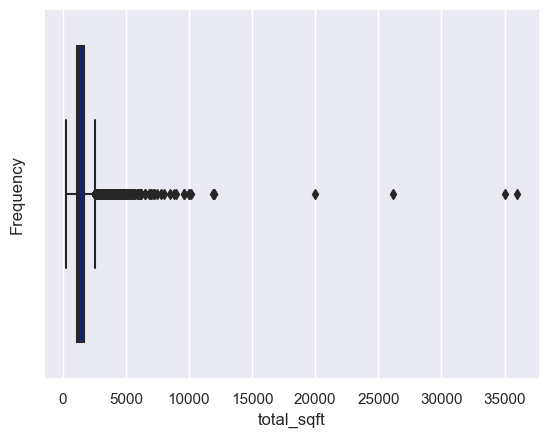

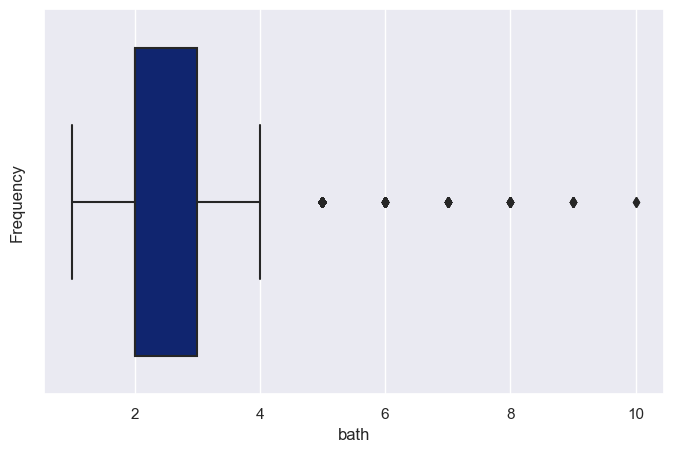

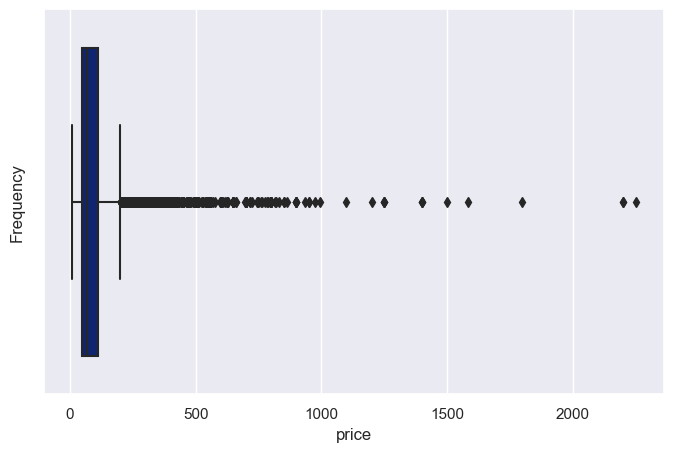

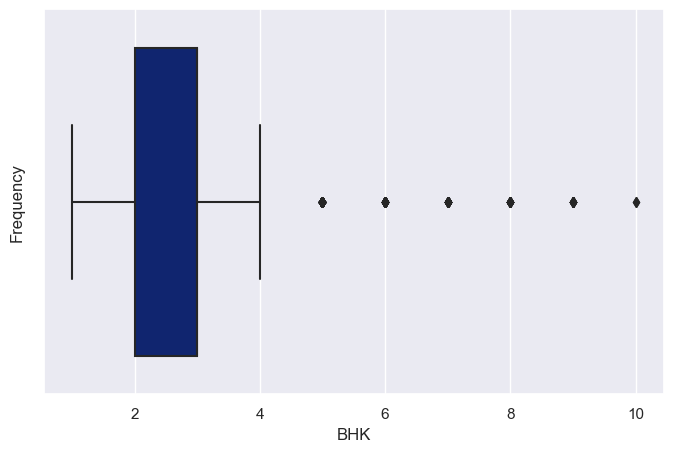

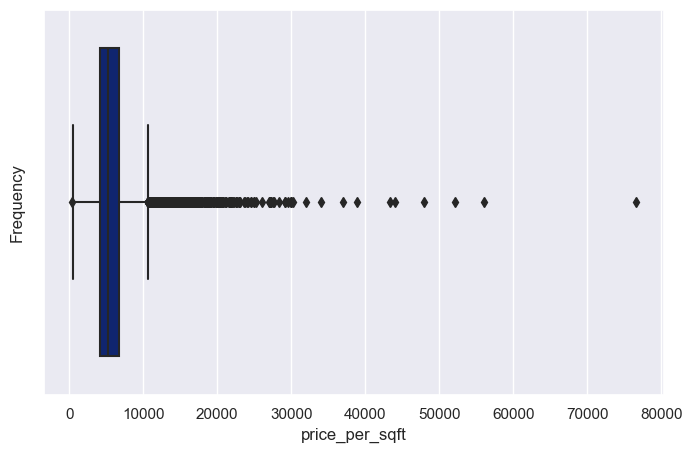

In [61]:
import seaborn as sns

for i in Numerical:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df8[i], palette='dark');

In [62]:
number_of_outliers=[None]*len(Numerical)
q75=[None]*len(Numerical)
q25=[None]*len(Numerical)
IQR=[None]*len(Numerical)
unique_values=[None]*len(Numerical)
ratio=[None]*len(Numerical)

for i, p in enumerate(Numerical):
    q75[i], q25[i]= np.percentile(df8[p],[75,25])
    IQR[i]= q75[i]- q25[i]
    number_of_outliers[i]=len((np.where((df8[p] > (q75[i] + 1.5 * IQR[i])) | (df8[p]< (q25[i] - 1.5 * IQR[i])))[0]))
    unique_values[i]= len(df8[p].unique())
    ratio[i]= number_of_outliers[i]/unique_values[i]
    
    print('outliers of',p," =", number_of_outliers[i])
    print('unique_values',p," =", unique_values[i])
    print('ratio',p," =", ratio[i])
    print("*"*40)

outliers of total_sqft  = 705
unique_values total_sqft  = 1729
ratio total_sqft  = 0.40775014459224984
****************************************
outliers of bath  = 365
unique_values bath  = 10
ratio bath  = 36.5
****************************************
outliers of price  = 801
unique_values price  = 1739
ratio price  = 0.4606095457159287
****************************************
outliers of BHK  = 232
unique_values BHK  = 10
ratio BHK  = 23.2
****************************************
outliers of price_per_sqft  = 626
unique_values price_per_sqft  = 6198
ratio price_per_sqft  = 0.101000322684737
****************************************


In [63]:
#Find the outliers records which fall with +/- 25% boundaries 

Q1 = df8.quantile(0.25)
Q3 = df8.quantile(0.75)
IQR = Q3 - Q1

print("Number of outliers for entire dataset = ", len(df8[((df8 < (Q1 - 1.5 * IQR)) | (df8 > (Q3 + 1.5 * IQR))).any(axis=1)]))

Number of outliers for entire dataset =  1273


We can drop these outliers:

In [64]:
outliers_index= df8[((df8 < (Q1 - 1.5 * IQR)) |(df8 > (Q3 + 1.5 * IQR))).any(axis=1)].index
outliers_index

Int64Index([    1,     6,     7,    11,    22,    48,    62,    64,    79,
               85,
            ...
            13246, 13268, 13281, 13290, 13293, 13296, 13300, 13305, 13315,
            13318],
           dtype='int64', length=1273)

In [65]:
df8.iloc[62]

location            Yelahanka
total_sqft             1326.0
bath                      2.0
price                    78.0
BHK                         2
price_per_sqft    5882.352941
Name: 82, dtype: object

In [66]:
df8.shape

(8962, 6)

In [67]:
df9= pd.DataFrame(df8.drop(outliers_index.to_list(), axis=0))
df9

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
...,...,...,...,...,...,...
13309,Yeshwanthpur,1675.0,3.0,92.13,3,5500.298507
13310,Rachenahalli,1050.0,2.0,52.71,2,5020.000000
13312,Bellandur,1262.0,2.0,47.00,2,3724.247227
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245


In [68]:
df8.shape

(8962, 6)

dropped 1273 outlier rows:

In [69]:
df9.shape

(7689, 6)

In [70]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7689 entries, 0 to 13317
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        7689 non-null   object 
 1   total_sqft      7689 non-null   float64
 2   bath            7689 non-null   float64
 3   price           7689 non-null   float64
 4   BHK             7689 non-null   int64  
 5   price_per_sqft  7689 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 420.5+ KB


In [71]:
df9.sort_values(by="total_sqft")

,location,total_sqft,bath,price,BHK,price_per_sqft
10526,Yelahanka New Town,284.0,1.0,8.00,1,2816.901408
2486,Bhoganhalli,296.0,1.0,22.89,1,7733.108108
4853,Nagarbhavi,300.0,1.0,20.00,1,6666.666667
1471,Kengeri,340.0,1.0,10.00,1,2941.176471
3741,Yelahanka New Town,350.0,1.0,13.50,1,3857.142857
...,...,...,...,...,...,...
11251,Kanakpura Road,2546.0,3.0,170.00,3,6677.140613
5218,Ambalipura,2550.0,4.0,149.00,4,5843.137255
2320,Neeladri Nagar,2556.0,3.0,133.00,3,5203.442879
5628,Sarjapur Road,2556.0,3.0,169.00,3,6611.893584


In [73]:
df9.sort_values(by="bath")

,location,total_sqft,bath,price,BHK,price_per_sqft
2838,Vijayanagar,606.0,1.0,34.78,1,5739.273927
11958,Kengeri,550.0,1.0,16.75,1,3045.454545
6511,Marathahalli,700.0,1.0,38.00,1,5428.571429
2201,Electronic City,630.0,1.0,47.00,1,7460.317460
904,Kengeri Satellite Town,930.0,1.0,30.00,1,3225.806452
...,...,...,...,...,...,...
2901,Sarjapur,2540.0,4.0,115.00,4,4527.559055
4432,Sarjapur Road,2275.0,4.0,180.00,3,7912.087912
11059,Thanisandra,1948.0,4.0,129.00,4,6622.176591
2273,Sarjapur Road,1845.0,4.0,110.00,3,5962.059621


In [74]:
df9.sort_values(by="BHK")

,location,total_sqft,bath,price,BHK,price_per_sqft
4758,Sarjapur Road,715.0,1.0,29.000,1,4055.944056
5566,Balagere,675.0,1.0,45.000,1,6666.666667
9374,Yelahanka,1000.0,1.0,14.000,1,1400.000000
4190,Kanakpura Road,458.0,1.0,19.695,1,4300.218341
9371,Balagere,645.0,1.0,39.000,1,6046.511628
...,...,...,...,...,...,...
9261,Ramamurthy Nagar,2200.0,4.0,130.000,4,5909.090909
2120,Doddaballapur,1690.0,3.0,80.000,4,4733.727811
9863,Chikkabanavar,1500.0,4.0,105.000,4,7000.000000
7441,Mallasandra,1810.0,3.0,57.000,4,3149.171271


In [76]:
df9.sort_values(by="price_per_sqft")

,location,total_sqft,bath,price,BHK,price_per_sqft
11748,Begur,2400.0,3.0,12.0,3,500.000000
8391,Kengeri,1200.0,1.0,14.0,1,1166.666667
5652,JP Nagar,1100.0,1.0,15.0,2,1363.636364
9374,Yelahanka,1000.0,1.0,14.0,1,1400.000000
8653,Doddaballapur,640.0,1.0,10.5,2,1640.625000
...,...,...,...,...,...,...
3227,Koramangala,1900.0,2.0,200.0,2,10526.315789
9959,Electronic City,1800.0,3.0,190.0,4,10555.555556
2313,Malleshwaram,900.0,2.0,95.0,2,10555.555556
12491,Sarjapur Road,1750.0,3.0,185.0,4,10571.428571


In [77]:
df9.sort_values(by="price")

,location,total_sqft,bath,price,BHK,price_per_sqft
10526,Yelahanka New Town,284.0,1.0,8.0,1,2816.901408
8594,Chandapura,450.0,1.0,9.0,1,2000.000000
12579,Chandapura,410.0,1.0,10.0,1,2439.024390
11091,Attibele,410.0,1.0,10.0,1,2439.024390
1471,Kengeri,340.0,1.0,10.0,1,2941.176471
...,...,...,...,...,...,...
7594,Malleshwaram,2250.0,3.0,200.0,3,8888.888889
2367,Kadugodi,1920.0,4.0,200.0,4,10416.666667
1137,Whitefield,2400.0,4.0,200.0,4,8333.333333
7603,7th Phase JP Nagar,2100.0,3.0,200.0,3,9523.809524


In [78]:
df9.shape

(7689, 6)

In [79]:
df10 = df9.drop(['price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2


In [80]:
dummy1= pd.get_dummies(df10.location)
dummy1.head()

,1st Block Jayanagar,1st Phase JP Nagar,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
df11 = pd.concat([df10, dummy1], axis='columns')
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Whitefield,1170.0,2.0,38.00,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [82]:
df12 = df11.drop('location', axis='columns')
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,38.00,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
df12.shape

(7689, 232)

## Splitting the Dataset

In [84]:
X= df12.drop(["price"], axis=1)
y= df12.price

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5382, 231), (2307, 231), (5382,), (2307,))

In [109]:
X_train

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
5201,670.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1512,1272.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9152,1650.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4823,1787.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6430,1190.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8817,1300.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9111,1590.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1374,2090.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13172,1464.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Handling Variables

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [89]:
pipe = Pipeline(steps=[
             ("scaler", StandardScaler()),
             ("imputer", SimpleImputer()),
             ])

In [90]:
X_train= pipe.fit_transform(X_train)
X_test= pipe.transform(X_test)

In [92]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [97]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [160]:
%%time
for model in models:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

LinearRegression()
	Training time: 0.835s
	Prediction time: 0.017s
	Explained variance: 0.7203367086838985
	Mean absolute error: 13.744225610555805
	R2 score: 0.7202334580937086

Ridge()
	Training time: 0.131s
	Prediction time: 0.002s
	Explained variance: 0.7207759254198394
	Mean absolute error: 13.723032357416605
	R2 score: 0.7206685400172499

Lasso()
	Training time: 0.087s
	Prediction time: 0.013s
	Explained variance: 0.6244096847024985
	Mean absolute error: 16.289155396595522
	R2 score: 0.6241665192323498

KNeighborsRegressor()
	Training time: 0.034s
	Prediction time: 0.654s
	Explained variance: 0.6482205212470145
	Mean absolute error: 14.883881664499352
	R2 score: 0.6478631177813772

DecisionTreeRegressor()
	Training time: 0.482s
	Prediction time: 0.012s
	Explained variance: 0.5874220715457799
	Mean absolute error: 14.799319895968791
	R2 score: 0.5872459187667044

RandomForestRegressor()
	Training time: 13.734s
	Prediction time: 0.142s
	Explained variance: 0.7204940768925332
	Mean 

The best R^2 estimate we got is from RandomForestRegressor. The estimation value is 0.7209.

## Cross Validation for Ridge Regressor model

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
models[5]

RandomForestRegressor()

In [113]:
%%time
cross_val_score(models[5], X_train, y_train, cv=5)

CPU times: total: 44.5 s
Wall time: 45 s


array([0.70434109, 0.71400091, 0.67840747, 0.739039  , 0.72636287])

## GridSearchCV for Ridge Regressor model

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
%%time
RF_param_grid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
    'max_depth' : [int(x) for x in np.linspace(20, 100, num = 5)],
                 }
RF_GridCV = GridSearchCV(models[5], RF_param_grid, cv=5, n_jobs= -1)
RF_GridCV.fit(X_train,y_train)  
print(RF_GridCV.best_params_)    
print(RF_GridCV.best_score_)

{'max_depth': 40, 'n_estimators': 600}
0.7166179749034566
CPU times: total: 1min 4s
Wall time: 54min 19s


In [142]:
Grid_Model_RF= RandomForestRegressor(max_depth= 40, n_estimators= 600)
Grid_Model_RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=40, n_estimators=600)

In [143]:
y_pred = Grid_Model_RF.predict(X_test)
print(r2_score(y_test,y_pred))

0.7245971637919846


In [144]:
def predict_price(location,sqft,bath,BHK):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if loc_index >= 0:
        x[loc_index] = 1

    return Grid_Model_RF.predict([x])[0]

In [162]:
df12.loc[df12["1st Block Jayanagar"]==1]

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
4991,1000.0,3.0,60.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8507,1760.0,3.0,115.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
predict_price('1st Block Jayanagar', 1000, 3, 2)

63.605464487571204

In [165]:
predict_price('1st Block Jayanagar', 1760, 3,3)

108.91777346253807

## Export the tested model to a pickle file

In [166]:
import pickle
with open('bangaluru_house_prices_RIFmodel.pickle','wb') as f:
    pickle.dump(Grid_Model_RF,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [167]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))